In this project, we are given a data set comprising of information about the people who boarded the Titanic ship. The information is important as it provides data about the people that survived and those that did not. Therefore, details concerning the the people that boarded this ship in 1912 can be seen in this data. The data can be downloaded [here](https://www.kaggle.com/c/titanic/overview) from the kaggle website.


The data shows that the sample size for people that boarded the Titanic were 891 and the total number was 2224 and that the survivor rates depended on different factors, for example sex and passenger class. This means that the likelihood for survivor to those in the first class may have been higher than those in the third class or that survivor rates may have depended on the persons sex. Therefore, the challenge given here involves developing a prediction model for surivor rates of passengers that boarded the Titanic Ship using factors given below:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class (1st, 2nd, or 3rd)
- **Sex** (str) - Gender of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

The first step in this project will be importing of relevant libraries

## Importing relevant Libaries

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Creating charts for analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import precision_score
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

## Reading the data

In [2]:
train_data = pd.read_csv('train.csv')
# Check the first five varibles
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv('test.csv')
# Check the first five variables
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


- Identifying numerical features

Numerical features are discrete, conitinous and timeseries. In this data, some numerical features are continous such as 'Age' and 'Fare' where as others are discrete such as 'SibSp' and 'Parch'

- Identifying categorical features

Categorical features vary such that some can be nominal, ordinal, ratio or interval based. In this data, 'Survived' and 'Sex' are categorical features where as 'Embarked' and 'Pclass' are ordinal.

In [4]:
# Check the size of the data sets
print('Train data set size:', train_data.shape)
print('Test data set size:', test_data.shape)

Train data set size: (891, 12)
Test data set size: (418, 11)


In [5]:
# Check the type of data stored in the train and test data set
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
test_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
# See the distribution of our target varible in train data set
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
combined_data = [train_data, test_data]

From the train data set it can be seen that the number of people that did not survive were 549 while those that survived were 342. Therefore, those who didnt survive were the majority of this data set.

## Explore numerical data

In [9]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The statistics show that age and Fare had a high standard deviation which can be explained by the large differences between their mins and maxs. This high standard divaition means that the data variables have outliers.

In [10]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


From the table above, we can see that Fare and Pclass have atleast a strong correlation with the target variable ('survived'). Also Fare and class have a negative correlation with each other meaning that as Pclass increases Fare reduces. Different kinds of data can be seen to have strong correlations among themselves and this is not good for data training because such correlations among features will result into an unclear signal about features that are contributing more to the prediction.

In [11]:
# See how Fare compares with Pclass
train_data.groupby('Pclass')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


As explained above, as Pclass increases from 1st to 3rd class, Fare reduces from 512 to 69 hence the strong negative correlation observed above.

In [12]:
# Check the distribution of each feature at each level of the target variable
from scipy import stats
def describe_cont_feature(feature):
    print(f'\n *** Results {feature} ***')
    print(train_data.groupby('Survived')[feature].describe())
    print(ttest(feature))
    
def ttest(feature):
    survived = train_data[train_data['Survived']==1][feature]
    not_survived = train_data[train_data['Survived']==0][feature]
    tstat, pval = stats.ttest_ind(survived, not_survived, equal_var = False)
    print(f't-statistic: {tstat}, p_value: {pval}')

In [13]:
for feature in ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']:
    describe_cont_feature(feature)


 *** Results Pclass ***
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  2.531876  0.735805  1.0  2.0  3.0  3.0  3.0
1         342.0  1.950292  0.863321  1.0  1.0  2.0  3.0  3.0
t-statistic: -10.336953406118893, p_value: 2.9111554993758305e-23
None

 *** Results Age ***
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0
t-statistic: nan, p_value: nan
None

 *** Results SibSp ***
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  0.553734  1.288399  0.0  0.0  0.0  1.0  8.0
1         342.0  0.473684  0.708688  0.0  0.0  0.0  1.0  4.0
t-statistic: -1.1943534366570652, p_value: 0.23266263459528724

In [14]:
# Look at the value of each feature based on wether NAN in Age is missing randomly or not
train_data.groupby(train_data['Age'].isnull()).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,,
False,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


This therefore, shows that the distrbution of the NAN value is semi random

#### A summary explaning the numerical data explored above
- As explained above, the total of sample is 891 of which the number of passengers on the ship is 2224.
- In the target variable 'Survived', 1 implies survived while 0 implies did not survived
- From the given sample, 342 passengers out of 891 survived. This means that 38 % of the sample survived.
- About 30 % of passengers had siblings and or spouces on board
- Data shows that most passengers did not travel with parents or children
- Fares and passenger class had a negative correlation
- There was a difference of 512 between the minimum and maximum fares
- There was a small number of elderly passengers within the age range of 65-80
- The difference between the maximum age and the minimum age in the train sample was about 80
- The difference between maximum and minimum numbers of SibSp can be neglected
- The difference between maximum and minimum numbers of Parch can also be neglected when considering the outlier effect

## Explore the categorical data

In [15]:
train_data.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


#### A summary explaining the category data explored above
- From the table shown above, we that all the 891 values in the Name variable are unique
- The variable of Sex has two possible values with males occupying 65 % of the total sample number
- Ticket variable has 681 unique values while 210 arent. It has many duplicates.
- Cabin has 147 unique values with several duplicates.
- Embarked has 3 unique values with S being the most used port

## Feature analysis

In order to draw assumptions and concepts about the survivor rates of passengers that boarded the Titanic, the features of our data set will be analysed. This analysis will help to pave way for data wrangling.

In [16]:
# Check for missing values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From the train and test data sets, it can be seen that Age, Cabin, Embarked and Fare have missing values. And so the features below that will be explored are those without NANs. Therefore, the following features will be analysed:

- **Pclass** is seen 0.3 correlation with **Survived**  therefore, it will be added to our model
- **Sex** has been taken as important factor for determining survivor rates and so, it will be added to our model
- **SibSp and Parch** are strongly correlated to each other, so to prevent a noisy signal from them during training, its best that they are combined into one varibale


In [17]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', 
                                                                                            ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [18]:
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived',
                                                                                     ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [19]:
train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by = 'Survived', 
                                                                                         ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [20]:
train_data[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by = 'Survived', 
                                                                                          ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### Numerical feature analysis using visualisations

<function matplotlib.pyplot.show(close=None, block=None)>

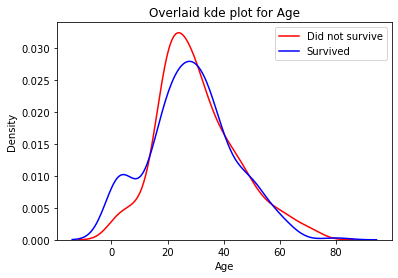

In [21]:
# Showing plots for age and fare with survival
died = list(train_data[train_data['Survived'] == 0]['Age'].dropna())
survived = list(train_data[train_data['Survived'] == 1]['Age'].dropna())
sns.kdeplot(died, color = 'r')
sns.kdeplot(survived, color = 'b')
plt.legend(['Did not survive', 'Survived'])
plt.xlabel('Age')
plt.title(f'Overlaid kde plot for Age')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

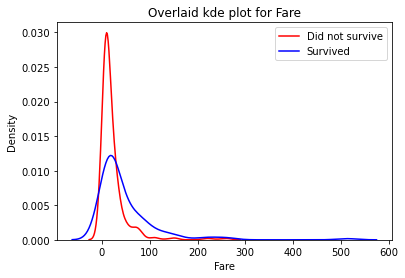

In [22]:
died = list(train_data[train_data['Survived'] == 0]['Fare'].dropna())
survived = list(train_data[train_data['Survived'] == 1]['Fare'].dropna())
sns.kdeplot(died, color = 'r')
sns.kdeplot(survived, color = 'b')
plt.legend(['Did not survive', 'Survived'])
plt.xlabel('Fare')
plt.title(f'Overlaid kde plot for Fare')
plt.show

#### Discussion
- From the graphs shown above, it can be seen that passenger with the age (>7) less that seven had a high survival rates.
- Passengers with the age between 15 - 40 had a very high death rate.
- Most passengers that boarded the ship were in the age range of 15 - 35.
- The highest death rates also occured in the fare range of 0 - 40.
- Passengers with fares aroung 75 to 600 had a high survival rate.

Therefore, Age and Fare could be considered in our model for training after handling their respective missing values.

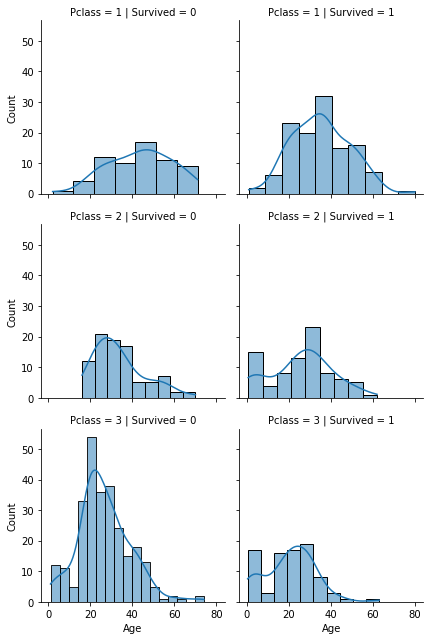

In [23]:
# Plot the distribution of Pclass class with respect to Age and Survive
g = sns.FacetGrid(train_data, col = 'Survived', row = 'Pclass')
g.map(sns.histplot, 'Age', kde = True)
g.add_legend();

#### Discussion

- The charts shown above indicate that the distribution of age among classes is different.
- Most children survived in 1st and 2nd class.
- Most passengers in the first class survived.
- Most passengers in the third class did not survive.

Passenger class could be added to the training model.

(0.0, 1.0)

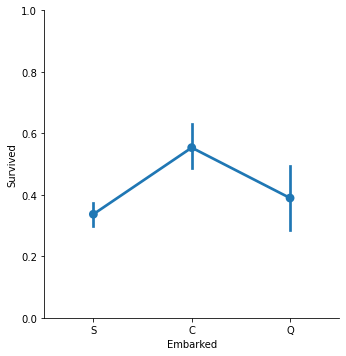

In [24]:
# Show a plot showing the survivor rates with respect to Embarked
sns.catplot(x = 'Embarked', y = 'Survived', data = train_data, kind = 'point')
plt.ylim(0, 1)

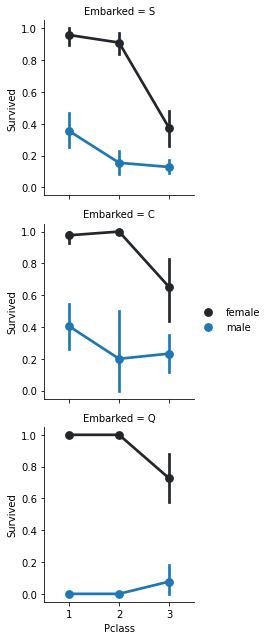

In [25]:
# Make a plot of embarked with respect to Pclass
g = sns.FacetGrid(train_data, row = 'Embarked')
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order = [1, 2, 3], hue_order = ['female', 'male'])
g.add_legend();

#### Discussion

- We can see that passengers that embarked at C = Cherbourg had higher survivor rates than others.
- The males that embarked at S = Southampton and C = Cherbourg had higher survivor rates than those that embarked at Q = Queens in all classes.
- The females that embarked at Q = Queens and C = Cherbourg in third class respectively had higher survivor rates than those that embarked at S = Southampton in third class.

Therefore, embarked could be added to the training model after cleaning it and also sex.

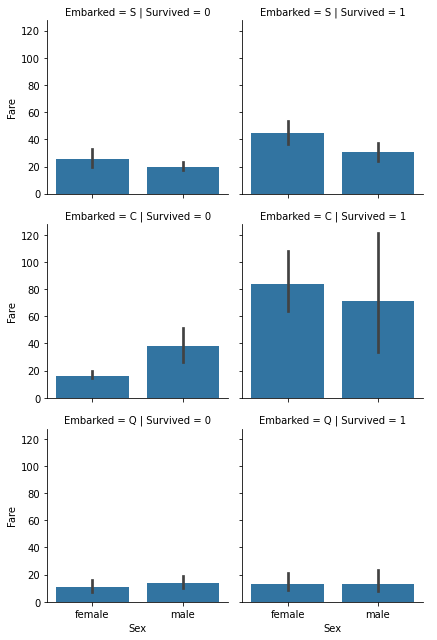

In [26]:
# Show a plot of embarked with respect to sex, fare and survival
g = sns.FacetGrid(train_data, row = 'Embarked', col = 'Survived')
g.map(sns.barplot, 'Sex', 'Fare', order = ['female', 'male'])
g.add_legend()

#### Discussion
- Passengers that embarked at S = Southampton and survived, had a distribution of fares among males and females which were higher than those that did not survive.
- It can alse be seen that those survivors that embarked at C = Cherbourg, had fares among males and females which were more than those that died.
- However, for passengers that embarked at Q =Queens, the variation in fares in males and females among survivors and those that died were almost the same.

Fare could be added to the training model.

## Data cleaning

The features have been analysed and discussed, however, the data has not yet been wrangled and prepared in a format that can allow for model training.

In [27]:
train_data = train_data.drop(['Ticket', 'Cabin'], axis = 1)
test_data = test_data.drop(['Ticket', 'Cabin'], axis = 1)

combined_data = [train_data, test_data]

Ticket and Cabin have been dropped because Ticket has no unique values and is neither categorical nor numerical varible where Cabin has a large number of NaNs.

In [28]:
# Create a title feature by parsing passenger name
for dataset in combined_data:
    dataset['Titles'] = dataset['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())  
    
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Titles
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [29]:
# Check survivor rate by Title
train_data.pivot_table('Survived', index=['Titles', 'Sex'], aggfunc=['count', 'mean'])

count      mean
                    Survived  Survived
Titles       Sex                      
Capt         male          1  0.000000
Col          male          2  0.500000
Don          male          1  0.000000
Dr           female        1  1.000000
             male          6  0.333333
Jonkheer     male          1  0.000000
Lady         female        1  1.000000
Major        male          2  0.500000
Master       male         40  0.575000
Miss         female      182  0.697802
Mlle         female        2  1.000000
Mme          female        1  1.000000
Mr           male        517  0.156673
Mrs          female      125  0.792000
Ms           female        1  1.000000
Rev          male          6  0.000000
Sir          male          1  1.000000
the Countess female        1  1.000000

In [30]:
# Editing and replacing titles
for dataset in combined_data:
    dataset['Titles'] = dataset['Titles'].replace(['Lady', 'the Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 
                                                'Jonkheer', 'Dona'], 'Others')
    
    dataset['Titles'] = dataset['Titles'].replace('Mlle', 'Miss')
    dataset['Titles'] = dataset['Titles'].replace('Ms', 'Miss')
    dataset['Titles'] = dataset['Titles'].replace('Mme', 'Mrs')
    
train_data[['Titles', 'Survived']].groupby(['Titles'], as_index = False).mean()

,Titles,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Others,0.347826


In [31]:
# Convert categorical titles to ordinal.
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Others': 5}
for dataset in combined_data:
    dataset['Titles'] = dataset['Titles'].map(title_mapping)
    dataset['Titles'] = dataset['Titles'].fillna(0)
    
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Titles
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [32]:
# Drop Name and PassengerId
train_data = train_data.drop(['Name', 'PassengerId'], axis = 1)
test_data = test_data.drop(['Name'], axis = 1)
combined_data = [train_data, test_data]

In [33]:
# Convert a catgorical feature 'Sex' to a numerical value
for dataset in combined_data:
    dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0}).astype(int)
    
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titles
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [34]:
# Handling missing values in 'Age'
my_guessed_age = np.zeros((2,3))
my_guessed_age

array([[0., 0., 0.],
       [0., 0., 0.]])

In [35]:
for data in combined_data:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_data = data[(data['Sex'] == i) & \
                                  (data['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            guess = guess_data.median()

            # Convert random age float to nearest .5 age
            my_guessed_age[i,j] = int( guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            data.loc[ (data.Age.isnull()) & (data.Sex == i) & (data.Pclass == j+1),\
                    'Age'] = my_guessed_age[i,j]

    data['Age'] = data['Age'].astype(int)

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titles
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [36]:
# Create age bands
train_data['AgeBand'] = pd.cut(train_data['Age'], 5)
train_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [37]:
# Reduce age into counts of AgeBand
for dataset in combined_data:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titles,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [38]:
# Drop AgeBand
train_data = train_data.drop(['AgeBand'], axis = 1)
combine_data = [train_data, test_data]
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titles
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [39]:
# Handle the missing values in Embarked. replace the missing values with the most common value.
freq_value = train_data.Embarked.dropna().mode()[0]
freq_value

'S'

In [40]:
train_data['Embarked'] = train_data['Embarked'].fillna(freq_value)
    
test_data['Embarked'] = test_data['Embarked'].fillna(freq_value)

combined_data = [train_data, test_data]

In [41]:
# Convert categorical data to (ordinal) numerical data
for dataset in combined_data:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titles
0,0,3,0,1,1,0,7.2500,0,1
1,1,1,1,2,1,0,71.2833,1,3
2,1,3,1,1,0,0,7.9250,0,2
3,1,1,1,2,1,0,53.1000,0,3
4,0,3,0,2,0,0,8.0500,0,1


In [42]:
# Convert Fare from continuos numerical feature to ordinal feature
# First, replace the missing value with the median value
test_data['Fare'].fillna(test_data['Fare'].dropna().median(), inplace=True)
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titles
0,892,3,0,2,0,0,7.8292,2,1
1,893,3,1,2,1,0,7.0000,0,3
2,894,2,0,3,0,0,9.6875,2,1
3,895,3,0,1,0,0,8.6625,0,1
4,896,3,1,1,1,1,12.2875,0,3


In [43]:
# Show the Fare intervals
train_data['FareBand'] = pd.qcut(train_data['Fare'], 4)
train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [44]:
# Convert Fare to ordinal values
for dataset in combined_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_data = train_data.drop(['FareBand'], axis=1)
combined_data = [train_data, test_data]

(0.0, 1.0)

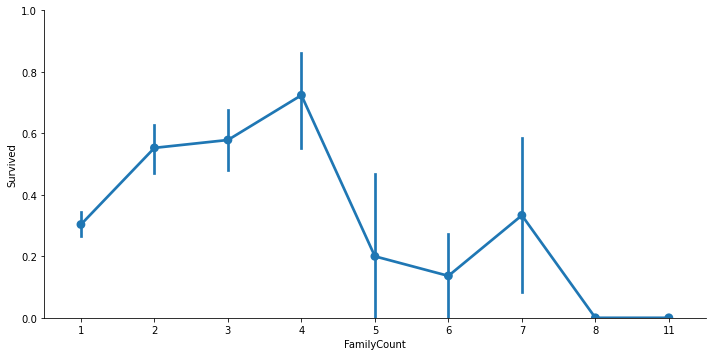

In [45]:
# Combine the features SibSp and Parch
for dataset in combined_data:
    dataset['FamilyCount'] = dataset['SibSp'] + dataset['Parch'] + 1
    
sns.catplot(x='FamilyCount', y='Survived', data=train_data, kind='point', aspect=2)
plt.ylim(0, 1)

The higer the family count the lower the chances for survival.

In [46]:
# Creat another feature called isalone
for dataset in combined_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilyCount'] == 1, 'IsAlone'] = 1

train_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [47]:
# Drop Family Size
train_data = train_data.drop(['FamilyCount'], axis=1)
test_data = test_data.drop(['FamilyCount'], axis=1)
combined_data = [train_data, test_data]

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titles,IsAlone
0,0,3,0,1,1,0,0,0,1,0
1,1,1,1,2,1,0,3,1,3,0
2,1,3,1,1,0,0,1,0,2,1
3,1,1,1,2,1,0,3,0,3,0
4,0,3,0,2,0,0,1,0,1,1


In [48]:
# Check data correlation again
train_data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titles,IsAlone
Survived,1.000000,-0.338481,0.543351,-0.065095,-0.035322,0.081629,0.295875,0.106811,0.407753,-0.203367
Pclass,-0.338481,1.000000,-0.131900,-0.119955,0.083081,0.018443,-0.628459,0.045702,-0.173929,0.135207
Sex,0.543351,-0.131900,1.000000,-0.086719,0.114631,0.245489,0.248940,0.116569,0.502713,-0.303646
Age,-0.065095,-0.119955,-0.086719,1.000000,-0.066396,-0.043457,0.026774,0.038064,-0.042927,0.063066
SibSp,-0.035322,0.083081,0.114631,-0.066396,1.000000,0.414838,0.394248,-0.059961,0.269623,-0.584471
Parch,0.081629,0.018443,0.245489,-0.043457,0.414838,1.000000,0.393048,-0.078665,0.315784,-0.583398
Fare,0.295875,-0.628459,0.248940,0.026774,0.394248,0.393048,1.000000,-0.091096,0.341665,-0.568942
Embarked,0.106811,0.045702,0.116569,0.038064,-0.059961,-0.078665,-0.091096,1.000000,0.045400,0.017807
Titles,0.407753,-0.173929,0.502713,-0.042927,0.269623,0.315784,0.341665,0.045400,1.000000,-0.405813
IsAlone,-0.203367,0.135207,-0.303646,0.063066,-0.584471,-0.583398,-0.568942,0.017807,-0.405813,1.000000


In [49]:
# Create an artificial feature Pclass and Fare
for dataset in combined_data:
    dataset['Pclass*Fare'] = dataset.Age * dataset.Pclass

This feature has been created because the two features are strongly correlated.

### Feature exploration

In [50]:
# Select strong correlations among variables
X = train_data.iloc[:, 1:11]
y = train_data.iloc[:, 0]
# Extract the best features
k_best = SelectKBest(score_func=chi2, k=10)
fit = k_best.fit(X,y)
names = pd.DataFrame(X.columns)
scores = pd.DataFrame(fit.scores_)
results = pd.concat([names, scores], axis = 1)
results.columns = ['Column', 'Result']
print(results.nlargest(12, 'Result'))

        Column      Result
9  Pclass*Fare  420.936430
1          Sex  170.348127
2          Age  102.504973
7       Titles   90.834029
5         Fare   64.722493
0       Pclass   30.873699
8      IsAlone   14.640793
6     Embarked   11.353117
4        Parch   10.097499
3        SibSp    2.581865


[0.10286082 0.19001979 0.04464151 0.09009037 0.05335715 0.10041391
 0.05828738 0.24788316 0.02103228 0.09141363]


<AxesSubplot:>

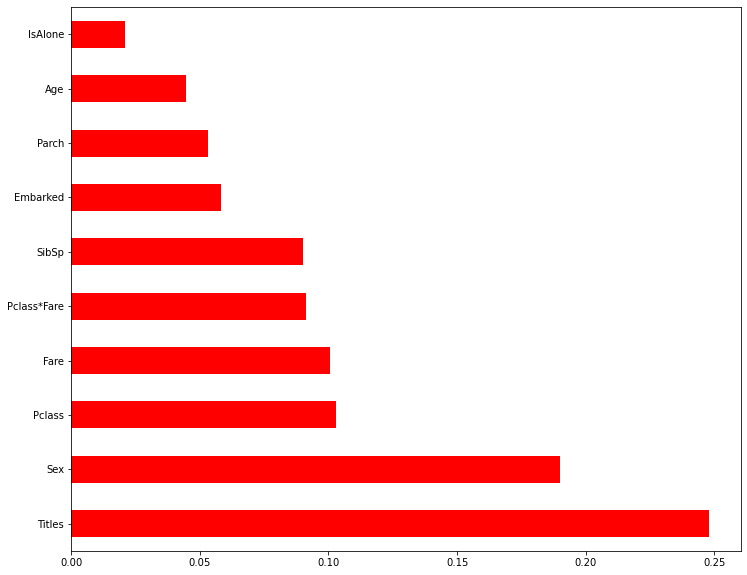

In [51]:
# Feature importance
model = RandomForestClassifier()
model.fit(X,y)
print(model.feature_importances_)
f_imp = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(12, 10))
f_imp.nlargest(13).plot(kind='barh', color = 'red')

In [52]:
# Select strong correlations among features
matrix = X.corr()
corr_pairs = matrix.unstack()
sorted_pairs = corr_pairs.sort_values(kind='quicksort')
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.7]

print(strong_pairs)

Age          Pclass*Fare    0.885165
Pclass*Fare  Age            0.885165
Pclass       Pclass         1.000000
Titles       Titles         1.000000
Embarked     Embarked       1.000000
Fare         Fare           1.000000
Parch        Parch          1.000000
SibSp        SibSp          1.000000
Age          Age            1.000000
Sex          Sex            1.000000
IsAlone      IsAlone        1.000000
Pclass*Fare  Pclass*Fare    1.000000
dtype: float64


Strong correlations among variables will result into a noisy signal such that the feature that contribute more to the training of the data will be unknown. Therefore, strongly correlated features have to be handled.

In [53]:
# Get top 10 correlation pairs
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Get top pairs
def get_top_abs_correlations(df, n=10):
    corr_list = df.abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    corr_list = corr_list.drop(labels=labels_to_drop).sort_values(ascending=False)
    return corr_list[0:n]

In [54]:
print('Top 10 correlation pairs:')
get_top_abs_correlations(matrix, 10)

Top 10 correlation pairs:


Age     Pclass*Fare    0.885165
Pclass  Fare           0.628459
SibSp   IsAlone        0.584471
Parch   IsAlone        0.583398
Fare    IsAlone        0.568942
Sex     Titles         0.502713
SibSp   Parch          0.414838
Titles  IsAlone        0.405813
SibSp   Fare           0.394248
Parch   Fare           0.393048
dtype: float64

In [55]:
# Feature selection
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [56]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = 5)
rfe = rfe.fit(X, np.ravel(y))

In [57]:
# Check the RFE ranking
list(zip(X.columns, rfe.support_, rfe.ranking_))

[('Pclass', True, 1),
 ('Sex', True, 1),
 ('Age', False, 2),
 ('SibSp', True, 1),
 ('Parch', False, 4),
 ('Fare', False, 6),
 ('Embarked', False, 5),
 ('Titles', True, 1),
 ('IsAlone', False, 3),
 ('Pclass*Fare', True, 1)]

In [58]:
# Columns selected by RFE
col = X.columns[rfe.support_]
col

Index(['Pclass', 'Sex', 'SibSp', 'Titles', 'Pclass*Fare'], dtype='object')

In [59]:
# columns not selected by RFE
X.columns[~rfe.support_]

Index(['Age', 'Parch', 'Fare', 'Embarked', 'IsAlone'], dtype='object')

In [60]:
# Seleceted features
X_data = X[col]
X_data.head()

,Pclass,Sex,SibSp,Titles,Pclass*Fare
0,3,0,1,1,3
1,1,1,1,3,2
2,3,1,0,2,3
3,1,1,1,3,2
4,3,0,0,1,6


Therefore, the factors that play an import role in the survival rates of passengers on the Titanic are:
Pclass = Passenger Class, Sex, SibSp = Siblings and Spouces, Titles, and Age*Fare.

In [61]:
X = X_data

## Data Training

In [62]:
# Traing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2) 

Training by using Random Forest Classifier

In [63]:

rf = RandomForestClassifier()
param_grid = [
    {'criterion': ['gini', 'entropy'],
    'n_estimators': [50, 100, 300, 500, 750],
    'max_features': [2, 3, 4, 5]
    }
]

clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 3, verbose = 0, n_jobs= -1)
best_clf = clf_rf.fit(X_train, np.ravel(y_train))

train_precision_score = cross_val_score(estimator=rf, X=X_train, y=np.ravel(y_train), 
                                         cv=5, scoring='precision')

In [64]:
print(f'The standard deviation of the precision score for rf is {train_precision_score.std()*100}')

The standard deviation of the precision score for rf is 4.812414490686981


In [65]:
best_clf.best_estimator_

RandomForestClassifier(max_features=4)

In [66]:
accuracy_rf = best_clf.score(X_train, np.ravel(y_train))
print(f'accuracy: {accuracy_rf}')

accuracy: 0.8562874251497006


In [67]:
pred_rf = clf_rf.predict(X_test)
best_score = precision_score(np.ravel(y_test), pred_rf)
print(f'best precision score for the rf model {best_score*100}')

best precision score for the rf model 86.56716417910447


Trainging with XG Boost

In [68]:
xgb = GradientBoostingClassifier()
param_grid = [
    {'max_depth': [4, 6, 8, 10, 12],
    'learning_rate': [0.3, 0.1, 0.05],
    }
]

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 3, verbose = 0, n_jobs= -1)
best_clf = clf_xgb.fit(X_train, np.ravel(y_train))

train_precision_score = cross_val_score(estimator=xgb, X=X_train, y=np.ravel(y_train), 
                                         cv=5, scoring='precision')

In [69]:
print(f'The standard deviation of the precision score for rf is {train_precision_score.std()*100}')

The standard deviation of the precision score for rf is 2.8588026509694733


In [70]:
best_clf.best_estimator_

GradientBoostingClassifier(learning_rate=0.05, max_depth=4)

In [71]:
accuracy_xgb = best_clf.score(X_train, np.ravel(y_train))
print(f'accuracy: {accuracy_xgb}')

accuracy: 0.8532934131736527


In [72]:
pred_xgb = clf_xgb.predict(X_test)
best_score = precision_score(np.ravel(y_test), pred_xgb)
print(f'best precision score for the rf model {best_score*100}')

best precision score for the rf model 84.28571428571429


Choosing the best model for predicting the test data.

Of the three classifiers, XGBoost produces a higher accuracy with a lower standard deviation. Therefore, it has been chosen for predictions.

In [73]:
test_df = test_data[col]
test_df.head()

,Pclass,Sex,SibSp,Titles,Pclass*Fare
0,3,0,0,1,6
1,3,1,1,3,6
2,2,0,0,1,6
3,3,0,0,1,3
4,3,1,1,3,3


In [74]:
submission_data = clf_xgb.predict(test_df)
results_submission=pd.DataFrame({"PassengerId": test_data["PassengerId"], 'Survived': submission_data})

In [75]:
results_submission.to_csv('final_submission.csv', index=False)